Library yang digunakan

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Loading dataset

In [2]:
# Membaca File CSV
df = pd.read_csv('../data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Menampilkan Informasi Umum
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Data Preprocessing

In [4]:
# Cek missing value
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
# Cek duplicate
df.duplicated().sum()

np.int64(0)

In [6]:
# Mengubah nama Kolom
df = df.rename(columns={
    'SepalLengthCm' : 'panjang_sepal',
    'SepalWidthCm' : 'lebar_sepal',
    'PetalLengthCm' : 'panjang_petal',
    'PetalWidthCm' : 'lebar_petal',
    'Species' : 'jenis_bunga'
})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   panjang_sepal  150 non-null    float64
 2   lebar_sepal    150 non-null    float64
 3   panjang_petal  150 non-null    float64
 4   lebar_petal    150 non-null    float64
 5   jenis_bunga    150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Data Understanding

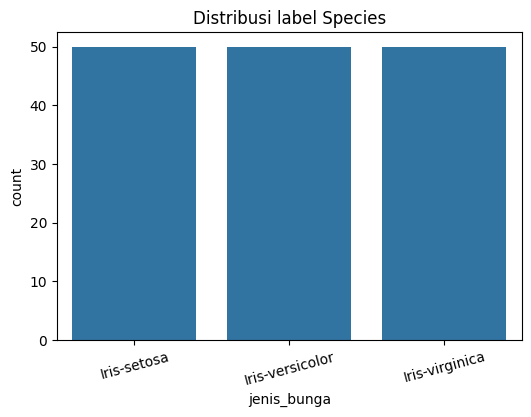

In [7]:
# Visualisasi Distribusi Label Target (Species)
plt.figure(figsize=(6, 4))
sns.countplot(x='jenis_bunga', data=df)
plt.title('Distribusi label Species')
plt.xticks(rotation=15)
plt.show()

Encoding Data Kategorikal (Mapping Label ke Kode Numerik) 

In [8]:
# Mapping label -> kode untuk target
species_cat = df['jenis_bunga'].astype('category')
species_classes = list(species_cat.cat.categories) # Urutan kelas
df['jenis_bunga'] = species_cat.cat.codes # y numerik

df.head()

,Id,panjang_sepal,lebar_sepal,panjang_petal,lebar_petal,jenis_bunga
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


Analisis Korelasi Antar Fitur

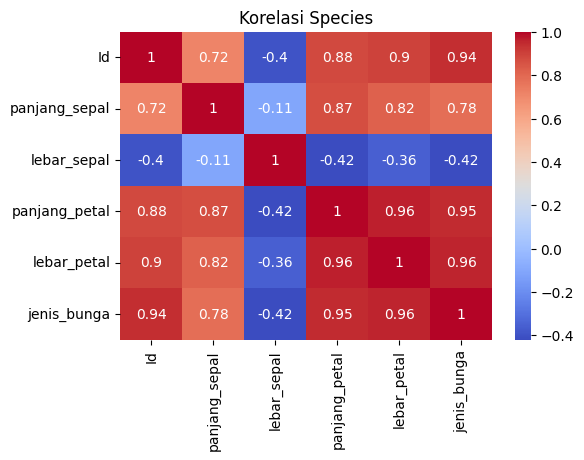

In [9]:
# Korelasi
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Species')
plt.show()

Splitting Data (Pembagian Data Training dan Testing)

In [10]:
# Memilih fitur dan target
feature_cols = ['panjang_sepal', 'panjang_petal', 'lebar_petal', 'panjang_petal']
X = df[feature_cols]
y = df['jenis_bunga']

# Membagi dataset
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
len(X_train), len(X_test)

(120, 30)

Pembuatan Model Decision Tree

In [11]:
# Membangun model
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Evaluasi Model Decision Tree

In [12]:
# Evaluasi
y_pred = dt.predict(X_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=species_classes))

Akurasi: 90.0 %

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



Visualisasi Hasil Model Decision Tree 

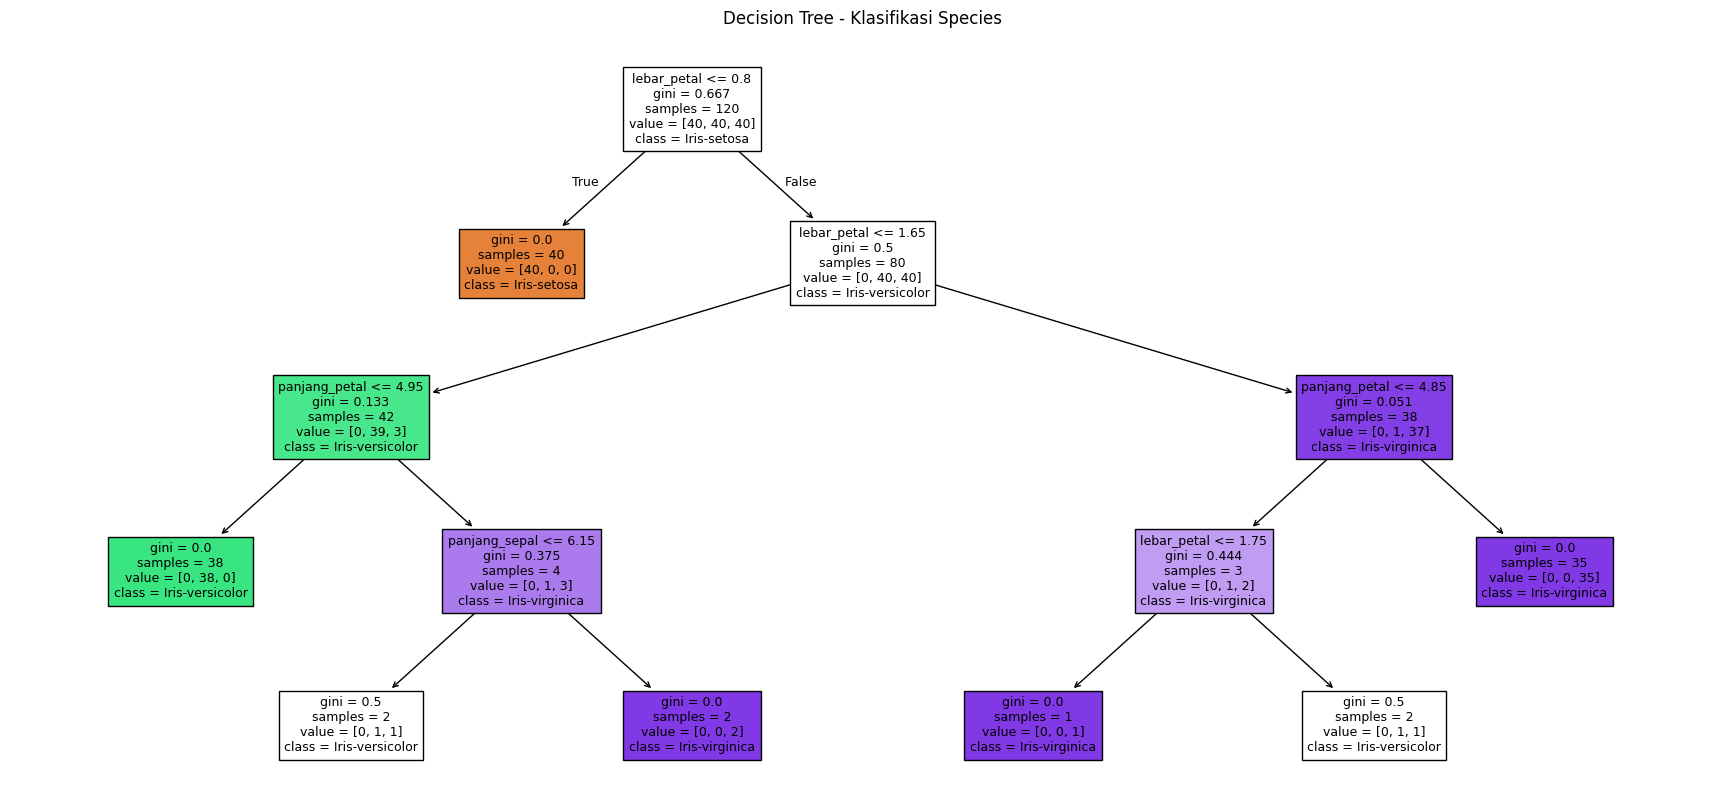

In [13]:
# Visualisai model
plt.figure(figsize=(22, 10))
plot_tree(
    dt,
    feature_names=feature_cols,
    class_names=species_classes,
    filled=True,
    fontsize=9
)
plt.title("Decision Tree - Klasifikasi Species")
plt.show()

Feature Importance (Fitur yang Paling Berpengaruh) 

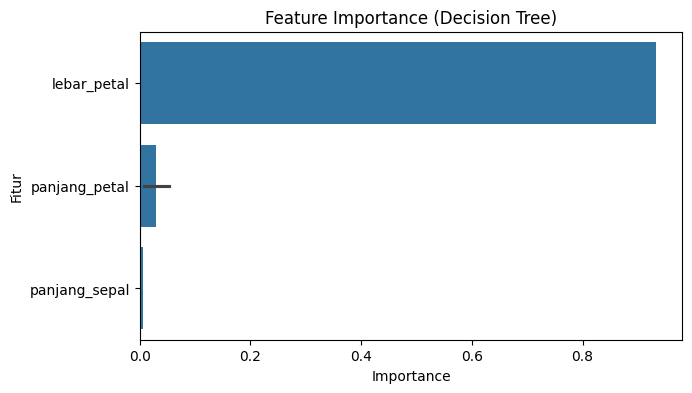

In [14]:
# Fitur yang penting

imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=False)
plt.figure(figsize=(7, 4))
sns.barplot(x=imp, y=imp.index)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Fitur")
plt.show()

Hyperparameter Tuning (Menentukan max_depth Terbaik) 

In [15]:
scores = {}
for d in range(2, nine := 9):
    m = DecisionTreeClassifier(max_depth=d, random_state=42)
    m.fit(X_train, y_train)
    scores[d] = accuracy_score(y_test, m.predict(X_test))

scores
best_d = max(scores, key=scores.get)
print("Best max_depth:", best_d, "| Acc:", round(scores[best_d]*100,2), "%")

Best max_depth: 3 | Acc: 96.67 %
